In [2]:
# importing Libraries

import pandas as pd                                   # for data-handling (loading and data manupulation)
import numpy as np                                    # for numerical operations
import matplotlib.pyplot as plt                       # for plotting graph
import seaborn as sns                                 # for visually appealing plots

# sklearn = provides ML tools
from sklearn.model_selection import train_test_split  # for splitting the data into training and test-sets
from sklearn.preprocessing import StandardScaler      # for scaling the data

# using regression models to make predictions -
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix # to evaluate how well the model performs

In [3]:
df = pd.read_csv('Lipophilicity.csv')   # loading the dataset file
df.head()                               # readingh first few rows of the dataset

,CMPD_CHEMBLID,exp,smiles
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14
1,CHEMBL1951080,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...
2,CHEMBL1771,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl
3,CHEMBL234951,3.37,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...
4,CHEMBL565079,3.10,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...


In [10]:
pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 23.9 MB/s eta 0:00:00


In [12]:
# turing textual representation of molecules (SMILES) into ML models

from rdkit import Chem
from rdkit.Chem import Descriptors

# function to extract features from each molecule
def featurize(smiles):

  #convert SMILES string into a molecule object
  mol = Chem.MolFromSmiles(smiles)
  if mol:
    return {
        'MolWt': Descriptors.MolWt(mol),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'MolLogP': Descriptors.MolLogP(mol),
        'NumHDonors': Descriptors.NumHDonors(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
      }
  else:
      return

In [14]:
# applying feature extraction to every molecule

# applying featurization function to each row
features = df['smiles'].apply(featurize)

# convert feature dictionaries to a DataFrame
features_df = pd.DataFrame([x for x in features if x is not None])

# match the cleaned data with the features and clean out the molecules that did not convert
df = df.loc[features_df.index].reset_index(drop=True)
features_df = features_df.reset_index(drop=True)

# concatenate the original DataFrame with the new features DataFrame
df = pd.concat([df, features_df], axis=1)
df.head()

,CMPD_CHEMBLID,exp,smiles,MolWt,NumRotatableBonds,MolLogP,NumHDonors,NumHAcceptors
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14,340.858,3,3.5489,0,4
1,CHEMBL1951080,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...,494.591,9,2.9901,2,7
2,CHEMBL1771,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl,321.829,3,3.6739,0,4
3,CHEMBL234951,3.37,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...,419.890,5,1.9237,4,5
4,CHEMBL565079,3.10,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...,381.480,6,2.0069,2,5


In [18]:
# splitting the dataset into training and test-sets

# separate input feactures and output labels
X = df[['MolWt', 'MolLogP', 'NumHDonors', 'NumHAcceptors']]
Y = df['exp'] # targetted experimental LogP

# split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
# Training the Machine Learning Model

model = LinearRegression()
model.fit(X_train, Y_train)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, Y_train)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [20]:
# making predictions and evaluating the model

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
root_mean_squared_error = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", root_mean_squared_error)
print("R-squared:", r2)

Mean Squared Error: 0.9868029228217375
Root Mean Squared Error: 0.9933795462066538
R-squared: 0.3321015481813482


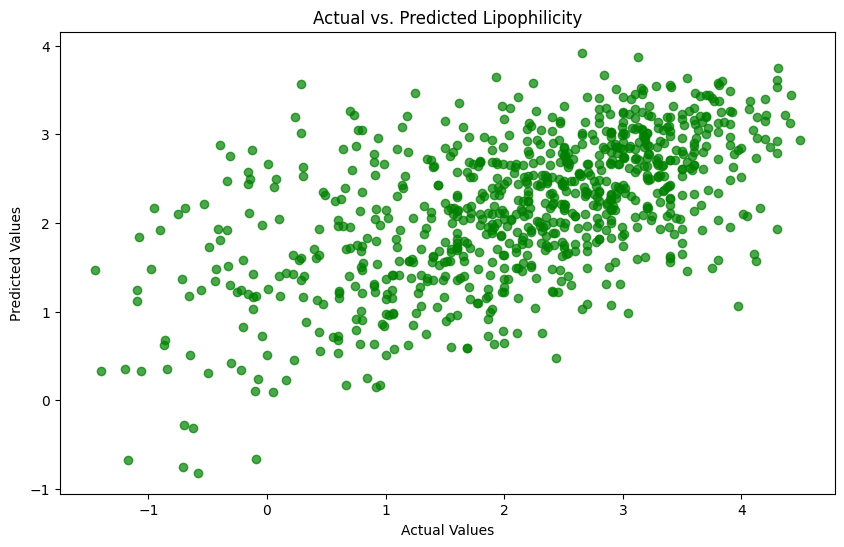

In [23]:
# Plottig the results

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.7, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Lipophilicity')
plt.show()